# WeatherPy
----
**Latitude Information**
1. Negative Values: Southern Hemisphere
2. 0 Value: Equator
3. Positive Values: Northern Hemisphere

### Analysis
**Latitude vs Maximum Temperature**
* Cities near the equator experience the highest maximum temperature.  As the latitude increases , the temperature drops significantly.  In general, the Southern Hemisphere have higher temperature than the Northern Hemisphere.

**Latitude vs Humidity and Latitude vs Cloudiness**
* The correlation between these 2 analysis have close to a zero correlation but the following trends are found:  
    * Almost 80% of the cities have humidity of 60% or more.
    * Majority of the cities have 0% or 80-100% clouiness.

**Latitude vs Wind Speed**
* There is no strong relationship between latitude and wind speed as the correlation is only 0.15. However, as the latitude around 60-90 degress, there are numerous cities with wind speed of more than 20 mph.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

622


In [4]:
### Perform API Calls
#Perform a weather check on each city using a series of successive API calls.

#Perform a quick test by coming up with a list of cities with successive API calls.  
#Also, I included a list of towns and random names to test if the try & except test works before running API calls of a  list of 500+ cites. 
city_test = ['Toronto', 'Paris', 'Zagreb', 'Hoian', 'Windsor', 'Unionville', 'Mississauga', 'Hanoi', 'San Francisco', 
             'Pickering','Raptors','Mississauga', 'Darth Vader', 'Chewy']

#Find url to extract api from owm website
base_url = f"http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&q="

#Create Empty List and set value at city count
city_test_list = []
city_number=1

#Include a print log of each city as it'sbeing processed (with the city number and city name).
for i in city_test:
    city_url = base_url + i
    response_test= requests.get(city_url).json()

    try:
        city_test_list.append(response_test['name'])
        print(f"Processing record {city_number} of|{i}")
        city_number +=1
        
    except:
        # Append null values
        print(f"City not found.  Skipping..")
        pass

    

Processing record 1 of|Toronto
Processing record 2 of|Paris
Processing record 3 of|Zagreb
City not found.  Skipping..
Processing record 4 of|Windsor
Processing record 5 of|Unionville
Processing record 6 of|Mississauga
Processing record 7 of|Hanoi
Processing record 8 of|San Francisco
Processing record 9 of|Pickering
City not found.  Skipping..
Processing record 10 of|Mississauga
City not found.  Skipping..
City not found.  Skipping..


In [5]:
# Create empty lists for dataframe to plot data
cityname = []
temperature_max = []
cloudiness =[]
humidity=[]
windspeed=[]
latitude=[]
longitude=[]
date=[]
country = []

print("Beginning Data Retrieval")
print("-----------------------------")

# Set value for record and set count
record = 1
set_number = 1

# Loop through the cities in the full cities list to get all the required weather information through API calls.
# Also, to get a print log of all the cities found from calling the API.



for city in cities:
    weather_url = base_url + city
    response= requests.get(weather_url + "&units=imperial").json()

    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature_max.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        print(f"Processing record {record} of set {set_number}|{city}")
        
        # record and set count
        if record > 49:
            record = 1
            set_number += 1
            cityname.append(city)
        else:
            record += 1
            cityname.append(city)
    except:
        # Append null values
        print(f"City not found.  Skipping..")
        pass
print("-----------------------------")
print("Data Retrieval Complete") 
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found.  Skipping..
Processing record 1 of set 1|olafsvik
Processing record 2 of set 1|busselton
Processing record 3 of set 1|berlevag
Processing record 4 of set 1|chuy
Processing record 5 of set 1|cape town
Processing record 6 of set 1|khatanga
Processing record 7 of set 1|punta arenas
Processing record 8 of set 1|tomatlan
Processing record 9 of set 1|sembabule
Processing record 10 of set 1|carnarvon
Processing record 11 of set 1|east london
City not found.  Skipping..
Processing record 12 of set 1|avera
Processing record 13 of set 1|pevek
Processing record 14 of set 1|ponta do sol
Processing record 15 of set 1|rikitea
Processing record 16 of set 1|thompson
City not found.  Skipping..
Processing record 17 of set 1|puerto ayora
Processing record 18 of set 1|qaanaaq
Processing record 19 of set 1|piatra neamt
Processing record 20 of set 1|college
Processing record 21 of set 1|luderitz
City not found.  Skipping..
Processing re

Processing record 48 of set 4|cartagena del chaira
Processing record 49 of set 4|svetlyy
Processing record 50 of set 4|touros
Processing record 1 of set 5|georgetown
Processing record 2 of set 5|sao filipe
Processing record 3 of set 5|griffin
Processing record 4 of set 5|smithers
Processing record 5 of set 5|sao joao da barra
Processing record 6 of set 5|bundaberg
Processing record 7 of set 5|tuatapere
City not found.  Skipping..
Processing record 8 of set 5|andenes
Processing record 9 of set 5|muros
Processing record 10 of set 5|sussex
Processing record 11 of set 5|paita
Processing record 12 of set 5|ixtapa
City not found.  Skipping..
Processing record 13 of set 5|bobo dioulasso
Processing record 14 of set 5|nishihara
Processing record 15 of set 5|tuktoyaktuk
Processing record 16 of set 5|murgab
Processing record 17 of set 5|pangnirtung
Processing record 18 of set 5|komsomolskiy
Processing record 19 of set 5|concepcion del uruguay
Processing record 20 of set 5|lata
Processing record 2

Processing record 47 of set 8|doka
Processing record 48 of set 8|elk river
City not found.  Skipping..
Processing record 49 of set 8|zhigansk
Processing record 50 of set 8|limbang
Processing record 1 of set 9|manzil kamil
Processing record 2 of set 9|bambous virieux
Processing record 3 of set 9|buraydah
Processing record 4 of set 9|olinda
Processing record 5 of set 9|ratnagiri
Processing record 6 of set 9|golden
Processing record 7 of set 9|beyneu
Processing record 8 of set 9|deputatskiy
City not found.  Skipping..
Processing record 9 of set 9|mapiripan
Processing record 10 of set 9|luzhou
Processing record 11 of set 9|rudnogorsk
City not found.  Skipping..
Processing record 12 of set 9|jasper
Processing record 13 of set 9|cabo san lucas
Processing record 14 of set 9|tashtyp
Processing record 15 of set 9|loughrea
Processing record 16 of set 9|muskegon
Processing record 17 of set 9|samarai
Processing record 18 of set 9|tual
Processing record 19 of set 9|saint-pierre
Processing record 20

In [6]:
### Convert Raw Data to DataFrame
# Display the DataFrame
weather_data = pd.DataFrame({
    'City': cityname,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Latitude': latitude,
    'Longitude': longitude,
    'Max Temperature': temperature_max,
    'Windspeed': windspeed
    
})
weather_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
0,olafsvik,62,IS,1604519905,71,64.89,-23.71,44.33,30.91
1,busselton,100,AU,1604520110,78,-33.65,115.33,52.00,5.99
2,berlevag,75,NO,1604520111,86,70.86,29.09,33.80,33.33
3,chuy,0,UY,1604520111,58,-33.70,-53.46,62.71,10.33
4,cape town,20,ZA,1604520111,68,-33.93,18.42,70.00,17.22
...,...,...,...,...,...,...,...,...,...
569,shu,0,KZ,1604520186,71,43.60,73.76,37.85,1.39
570,hazleton,1,US,1604520186,27,40.96,-75.97,64.40,6.93
571,petropavlovsk-kamchatskiy,100,RU,1604520186,51,53.05,158.65,37.40,15.66
572,asosa,0,ET,1604520187,82,10.07,34.53,64.99,4.97


In [7]:
#count the number of records by columns
weather_data.count()

City               574
Cloudiness         574
Country            574
Date               574
Humidity           574
Latitude           574
Longitude          574
Max Temperature    574
Windspeed          574
dtype: int64

In [8]:
# Export the city data into a .csv.
weather_data.to_csv("Output Files/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

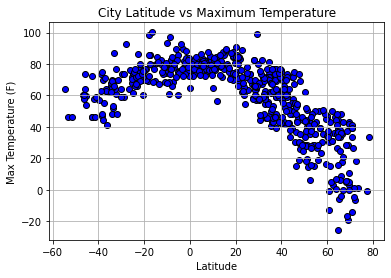

In [9]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,7], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_MaxTemp")

#### Latitude vs. Humidity Plot

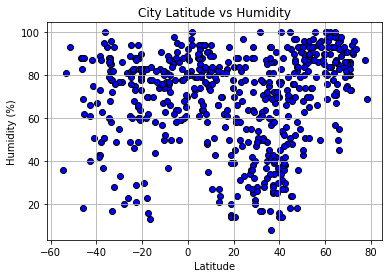

In [10]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,4], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_Humidity")

#### Latitude vs. Cloudiness Plot

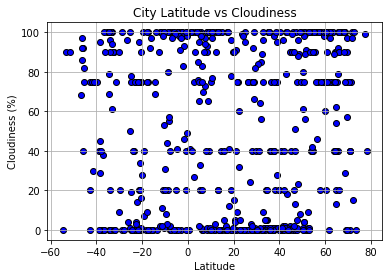

In [11]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,1], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_Cloudiness")

#### Latitude vs. Wind Speed Plot

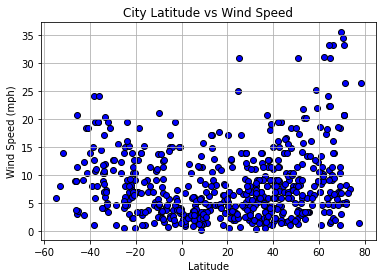

In [12]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weather_data.iloc[:,5], weather_data.iloc[:,8], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Latitude_WindSpeed")

### Linear Regression

In [15]:
#Extracting Northern and Southern Hemisphere Dataframes
northern_hemisphere_data = weather_data[(weather_data["Latitude"] >= 0)]
southern_hemisphere_data = weather_data[(weather_data["Latitude"] < 0)]
northern_hemisphere_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Windspeed
0,olafsvik,62,IS,1604519905,71,64.89,-23.71,44.33,30.91
2,berlevag,75,NO,1604520111,86,70.86,29.09,33.80,33.33
5,khatanga,15,RU,1604520111,90,71.97,102.50,-6.29,8.19
7,tomatlan,15,MX,1604520111,39,19.93,-105.25,91.13,6.26
11,avera,1,US,1604520112,30,33.19,-82.53,71.60,9.17
...,...,...,...,...,...,...,...,...,...
569,shu,0,KZ,1604520186,71,43.60,73.76,37.85,1.39
570,hazleton,1,US,1604520186,27,40.96,-75.97,64.40,6.93
571,petropavlovsk-kamchatskiy,100,RU,1604520186,51,53.05,158.65,37.40,15.66
572,asosa,0,ET,1604520187,82,10.07,34.53,64.99,4.97


In [16]:
# Define function for creating linear regression for the next 8 tables.
def linear_regression(x,y):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The correlation is : {round(rvalue,6)}")
    best_fit_plots = x * slope + intercept
    best_fit_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")
    plt.plot(x,best_fit_plots,linewidth = 1,color="red")
    return best_fit_equation

# Define a fuction for annotating
def annotate(best_fit_equation, a, b):
    plt.annotate(best_fit_equation,(a,b),fontsize=12)

#### Northern Hemisphere - Maximum Temperature (F) vs Latitude

In [14]:
# Define x & y values
xy_values = linear_regression(northern_hemisphere_data.iloc[:,5], northern_hemisphere_data.iloc[:,7])

# Display regression equation in the preferred location of scatter plot
plt.annotate(xy_values,(10,20),color="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Northern Hemisphere - Maximum Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Northern_Hemisphere_MaxTemp")

NameError: name 'northern_hemisphere_data' is not defined

#### Southern Hemisphere - Maximum Temperature (F) vs Latitude

The r-squared is : 0.509715


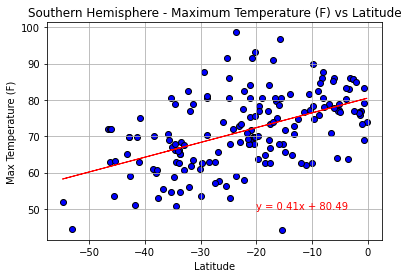

In [65]:
# Define x & y values
xy_values = linear_regression(southern_hemisphere_data.iloc[:,5], southern_hemisphere_data.iloc[:,7])

# Display regression equation in the preferred location of scatter plot
plt.annotate(xy_values,(-20,50),color="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Southern Hemisphere - Maximum Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Southern_Hemisphere_MaxTemp")

#### Northern Hemisphere - Humidity (%) vs Latitude

The r-squared is : 0.252445


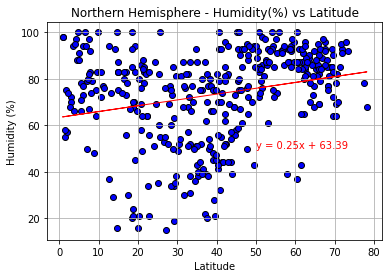

In [67]:
# Define x & y values
xy_values = linear_regression(northern_hemisphere_data.iloc[:,5], northern_hemisphere_data.iloc[:,4])

# Display regression equation in the preferred location of scatter plot
plt.annotate(xy_values,(50,50),color="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Northern Hemisphere - Humidity(%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Northern_Hemisphere_Humidity")

#### Southern Hemisphere - Humidity (%) vs Latitude

The r-squared is : 0.166729


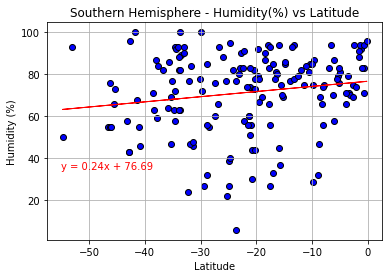

In [68]:
# Define x & y values
xy_values = linear_regression(southern_hemisphere_data.iloc[:,5], southern_hemisphere_data.iloc[:,4])

# Display regression equation in the preferred location of scatter plot
plt.annotate(xy_values,(-55,35),color="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Southern Hemisphere - Humidity(%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Southern_Hemisphere_Humidity")


#### Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is : 0.145082


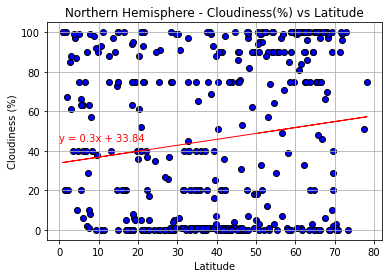

In [71]:
# Define x & y values
xy_values = linear_regression(northern_hemisphere_data.iloc[:,5], northern_hemisphere_data.iloc[:,1])

# Display regression equation in the preferred location of scatter plot
plt.annotate(xy_values,(0,45),color="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Northern Hemisphere - Cloudiness(%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Northern_Hemisphere_Cloudiness")

#### Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared is : 0.051295


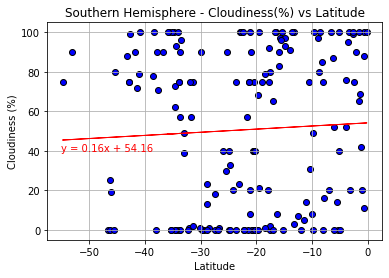

In [74]:
# Define x & y values
xy_values = linear_regression(southern_hemisphere_data.iloc[:,5], southern_hemisphere_data.iloc[:,1])

# Display regression equation in the preferred location of scatter plot
plt.annotate(xy_values,(-55,40),color="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Southern Hemisphere - Cloudiness(%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Southern_Hemisphere_Cloudiness")

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is : 0.289673


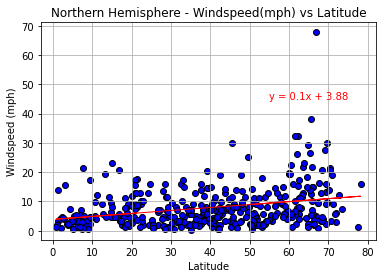

In [80]:
# Define x & y values
xy_values = linear_regression(northern_hemisphere_data.iloc[:,5], northern_hemisphere_data.iloc[:,8])

# Display regression equation in the preferred location of scatter plot
plt.annotate(xy_values,(55,45),color="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Northern Hemisphere - Windspeed(mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Northern_Hemisphere_Windspeed")

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared is : -0.315211


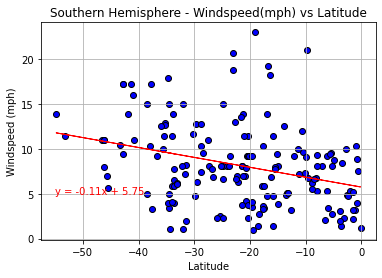

In [81]:
# Define x & y values
xy_values = linear_regression(southern_hemisphere_data.iloc[:,5], southern_hemisphere_data.iloc[:,8])

# Display regression equation in the preferred location of scatter plot
plt.annotate(xy_values,(-55,5),color="red")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Southern Hemisphere - Windspeed(mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid()

# Save scatter plot as png file to output folder
plt.savefig("Output Files/Southern_Hemisphere_Windspeed")